# Ecommerce Data Analysis

The "Ecommerce" dataset which is downloaded from Kaggle consists of over 540,000 records of data. The data describes about the 
details of different orders of the products which consists columns like (Country, CustomerID, Unit Price, Quantity..etc.).
By using python libraries like pandas,matplotlib,seaborn I performed operations on dataset and plotted graphs from the dataset.
With this project I have learned to prepare and clean the data, analyse the data and make the data more understandable by plotting the graphs.  

## Downloading the Dataset

In [1]:
pip install jovian opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:

dataset_url = 'https://www.kaggle.com/datasets/carrie1/ecommerce-data' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\ecommerce-data" (use force=True to force download)


In [4]:

data_dir = './ecommerce-data'

Here, we find out the number of files present in the directory using os module.

In [5]:
import os
os.listdir(data_dir)

['data.csv']

In [6]:
project_name = "ecommerce data" # change this (use lowercase letters and hyphens only)

In [7]:
pip install jovian --upgrade -q

Note: you may need to restart the kernel to use updated packages.


In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vishalvinayt/ecommerce-data" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/vishalvinayt/ecommerce-data


'https://jovian.ai/vishalvinayt/ecommerce-data'

## Data Preparation and Cleaning

**TODO** - 
1. Familiarize the Dataset.
2. Handle the missing data.
3. Perform additional steps if requried.



In [10]:
import pandas

In [11]:
df=pandas.read_csv(data_dir+'/data.csv',encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Getting the basic idea of the DataFrame is important. For that performing the following steps is used get information about the DataFrame.

In [12]:
print(df.shape)
print(df.columns)

(541909, 8)
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [15]:
type(df['InvoiceDate'][0])

str

In the following step we convert the column to datetime format using pandas to_datetime attribute.

In [16]:
df['InvoiceDate']=pandas.to_datetime(df['InvoiceDate'])

It is important find the NaN values by which we can get idea of filtering and handling the missing values.

In [17]:
df.isna().sum()     

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [18]:
df['Description'][df['Description'].isnull()==True]

622       NaN
1970      NaN
1971      NaN
1972      NaN
1987      NaN
         ... 
535322    NaN
535326    NaN
535332    NaN
536981    NaN
538554    NaN
Name: Description, Length: 1454, dtype: object

Creating the 'Date' column by converting the InvoiceDate column to date format which includes the date of pirticular transaction excluding the total timestamp.

In [19]:
df['Date']=df['InvoiceDate'].dt.date

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [21]:
df.set_index('Date',drop=False,inplace=True)

The total sale of product on a pirticular date can be determined by multiplication of quantity of the product sold and its unit price. Thus, we create a new coloumn 'Total_Price' where its values results from multiplication of columns 'Quantity' and 'UnitPrice'.

In [22]:
df['Total_Price']=df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_Price
Date,,,,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
2010-12-01,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...
2011-12-09,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,10.20
2011-12-09,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12.60
2011-12-09,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60


In [23]:
import jovian

In [24]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vishalvinayt/ecommerce-data" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/vishalvinayt/ecommerce-data


'https://jovian.ai/vishalvinayt/ecommerce-data'

## Exploratory Analysis and Visualization





In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

Finding out the unique countries and number of orders occured in each country and plotting a graph between countries and number of orders.

In [26]:
no_country=df.Country.unique()
no_country

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [27]:
len(no_country)

38

In [28]:
count_country=df.Country.value_counts()  # counts the number of occurences of values in a column
count_country

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [29]:
count_country.values[0]/count_country.values.sum()

0.9143195628786382

<BarContainer object of 38 artists>

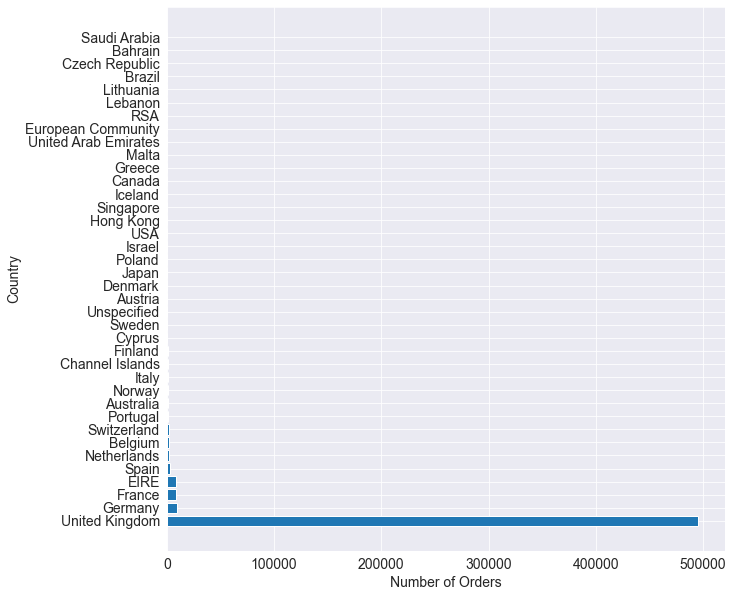

In [30]:
plt.figure(figsize=(10,10))
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.barh(count_country.index,count_country.values)

It appears that large amount of the orders over 90 percent are placed from United Kingdom in the period 2010-12 to 2011-09, probably the ecommerce website is originated in UK.

### Products

Distribution of products is crucial to determine the most selling product. For that the following steps were conducted. Finding out the unique products, numbers of orders of each product, filtering the top 20 most selling products.

In [31]:
no_items=df['Description'].unique()
no_items

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [32]:
len(no_items)

4224

In [33]:
count_items=df['Description'].value_counts()
count_items

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
SET 10 CARDS SNOWY ROBIN 17099           1
ACRYLIC JEWEL SNOWFLAKE,PINK             1
16 PC CUTLERY SET PANTRY DESIGN          1
rusty thrown away                        1
KEEP OUT GIRLS DOOR HANGER               1
Name: Description, Length: 4223, dtype: int64

<BarContainer object of 20 artists>

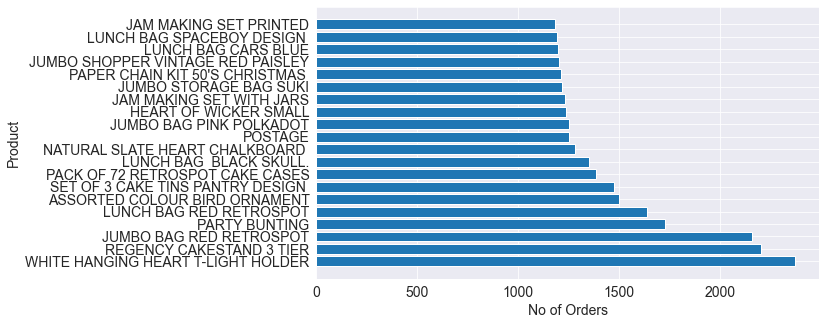

In [34]:
plt.xlabel('No of Orders')
plt.ylabel('Product')
plt.barh(count_items.index[:20],count_items.values[:20])

From the above bar plot, It is observed that 'WHITE HANGING HEART T-LIGHT HOLDER' has most percentage of orders compared to other products.

Now, let us find the distribution of products in United Kingdom as over 90 percent of orders were placed in United Kingdom by which we can find out most selling product in UK.

In [35]:
uk_items=df[['Country','Description']][df['Country']=='United Kingdom']
uk_items

,Country,Description
Date,,
2010-12-01,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
2010-12-01,United Kingdom,WHITE METAL LANTERN
2010-12-01,United Kingdom,CREAM CUPID HEARTS COAT HANGER
2010-12-01,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
2010-12-01,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
2011-12-09,United Kingdom,FAIRY TALE COTTAGE NIGHT LIGHT
2011-12-09,United Kingdom,LARGE CAKE STAND HANGING STRAWBERY
2011-12-09,United Kingdom,SET OF 3 HANGING OWLS OLLIE BEAK


In [36]:
uk_selling_item=uk_items['Description'].value_counts()
uk_selling_item

WHITE HANGING HEART T-LIGHT HOLDER    2271
JUMBO BAG RED RETROSPOT               2001
REGENCY CAKESTAND 3 TIER              1859
PARTY BUNTING                         1634
LUNCH BAG RED RETROSPOT               1460
                                      ... 
LETTER "U" BLING KEY RING                1
sold as 22467                            1
Breakages                                1
amazon adjust                            1
PINK CHERRY BLOSSOM CUP & SAUCER         1
Name: Description, Length: 4202, dtype: int64

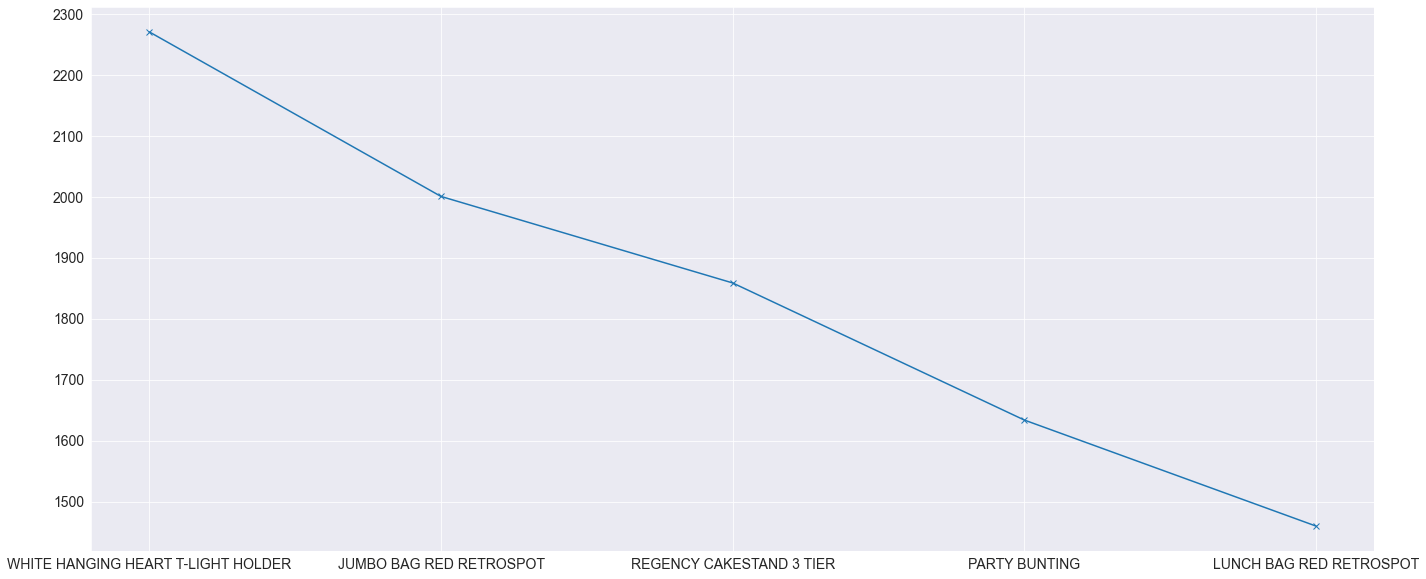

In [37]:

plt.figure(figsize=(23,10))
plt.plot(uk_selling_item.index[:5],uk_selling_item.values[:5],marker='x')

From the above line graph, It appears that over 2200 orders of  'WHITE HANGING HEART T-LIGHT HOLDER' were placed in UK and it is most selling product in UK in period 2010-12 to 2011-09 

### Customers

The customer distribution is important as it allows us to study the customers. For that a bar plot will be suitable for clear demostration.

In [38]:
top_customer=df.CustomerID.value_counts()
top_customer

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
13391.0       1
16579.0       1
13366.0       1
17763.0       1
17846.0       1
Name: CustomerID, Length: 4372, dtype: int64

<AxesSubplot:xlabel='CustomerID', ylabel='Number of Orders'>

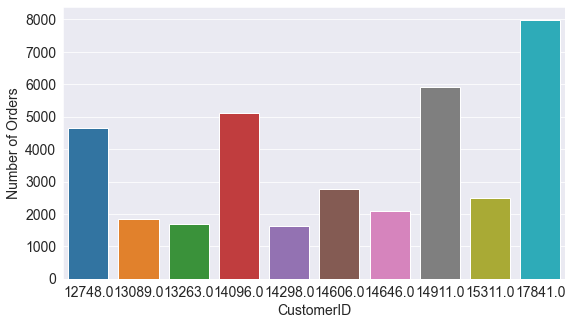

In [39]:
plt.xlabel('CustomerID')
plt.ylabel('Number of Orders')
sns.barplot(x=top_customer.index[:10],y=top_customer.values[:10])

It appears that the CustomerID '17841.0' has placed 2 percent of the total orders and placed most number of orders.

In [40]:
df[['CustomerID','Country']][df['CustomerID']==17841.0].head()

,CustomerID,Country
Date,,
2010-12-01,17841.0,United Kingdom
2010-12-01,17841.0,United Kingdom
2010-12-01,17841.0,United Kingdom
2010-12-01,17841.0,United Kingdom
2010-12-01,17841.0,United Kingdom


In studing the ecommerce data it is important to know about the distribution of replaced or cancelled orders for that we look out for the negative numbers in quantity which means the orders are replaced or cancelled orders.

In [41]:
df_cancel=df[df['Quantity']<0]
df_cancel

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_Price
Date,,,,,,,,,,
2010-12-01,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010-12-01,-27.50
2010-12-01,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12-01,-4.65
2010-12-01,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12-01,-19.80
2010-12-01,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,-6.96
2010-12-01,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,-6.96
...,...,...,...,...,...,...,...,...,...,...
2011-12-09,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011-12-09,-9.13
2011-12-09,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011-12-09,-224.69
2011-12-09,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011-12-09,-54.75


In [42]:
# Percentage of cancelled orders
(len(df_cancel)/len(df))*100

1.9604767590130447

In [43]:
# Total value of orders cancelled
total_val_of_cancelled_orders=df_cancel['Total_Price'].sum()
total_val_of_cancelled_orders

-896812.49

In [44]:
count_cancel=df_cancel['Country'].value_counts()
count_cancel

United Kingdom        9192
Germany                453
EIRE                   302
France                 149
USA                    112
Australia               74
Spain                   48
Italy                   45
Belgium                 38
Japan                   37
Switzerland             35
Portugal                18
Malta                   15
Norway                  14
Sweden                  11
Poland                  11
Channel Islands         10
Finland                 10
Denmark                  9
Netherlands              8
Cyprus                   8
Singapore                7
Czech Republic           5
Hong Kong                4
Austria                  3
Israel                   2
Saudi Arabia             1
European Community       1
Greece                   1
Bahrain                  1
Name: Country, dtype: int64

<BarContainer object of 10 artists>

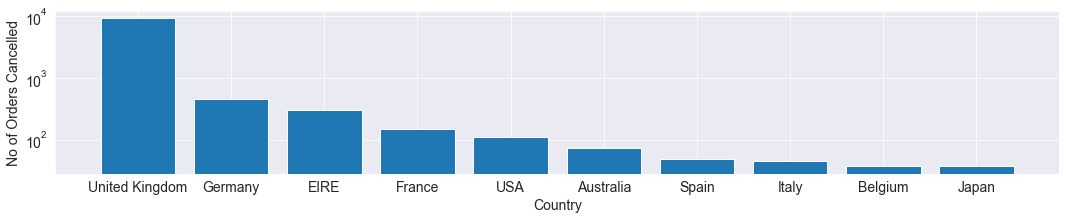

In [45]:
plt.figure(figsize=(18,3))
plt.ylabel('No of Orders Cancelled')
plt.xlabel('Country')
plt.bar(count_cancel.index[:10],count_cancel.values[:10],log=True)

From the above bar graph, it is observed that above 9000 orders were cancelled from UK contributing 2 percent of total orders and it is obvious as most of the orders are placed in UK. 

In [46]:
import jovian

In [47]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vishalvinayt/ecommerce-data" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/vishalvinayt/ecommerce-data


'https://jovian.ai/vishalvinayt/ecommerce-data'

## Asking and Answering Questions


#### Q1: TODO - What are the Monthly sales ?

This question can be answered by creating a new column named 'Month' by converting the InvoiceDate column to monthly format. Later, grouping the month column by taking sum of the Total_Price. 

In [48]:
df['Month']=df['InvoiceDate'].dt.strftime('%Y %m')

In [49]:
df_month=df.groupby('Month')['Total_Price'].sum()
df_month

Month
2010 12     748957.020
2011 01     560000.260
2011 02     498062.650
2011 03     683267.080
2011 04     493207.121
2011 05     723333.510
2011 06     691123.120
2011 07     681300.111
2011 08     682680.510
2011 09    1019687.622
2011 10    1070704.670
2011 11    1461756.250
2011 12     433668.010
Name: Total_Price, dtype: float64

The above tabel consists of the sum of Total_Price for each month.

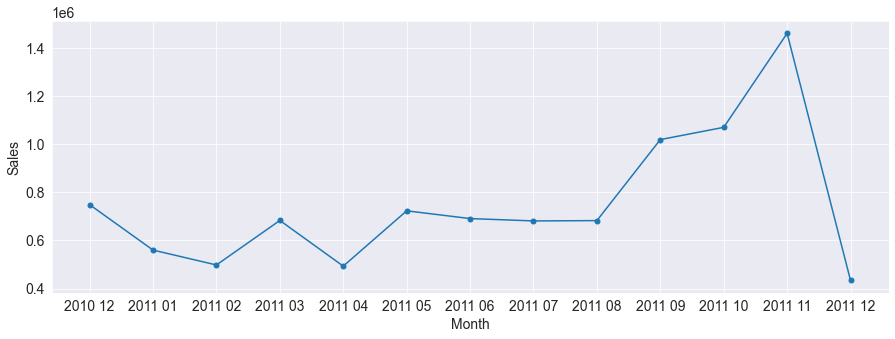

In [50]:

plt.figure(figsize=(15,5))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(df_month.index,df_month.values,marker='.',markersize=10)

It appears that the maximum sales occured in the month of November compared to other months, perhaps due to black friday sale that ocuurs in the november month.

#### Q2: TODO - What are monthly sales of top 10 products ?


This question can be answered by counting number of times each product has been ordered. Later, grouping both the month and description columns by taking sum of the Total_Price of each product follwed by filtering the top ten products. 

In [51]:
top_products=df['Description'].value_counts().sort_values(ascending=False)
top_products

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
website fixed                            1
SET OF 4 KNICK KNACK TINS  DOILEY        1
wrongly marked carton 22804              1
BLUE GINGHAM ROSE CUSHION COVER          1
KEEP OUT GIRLS DOOR HANGER               1
Name: Description, Length: 4223, dtype: int64

In [52]:
product_monthly_sales=df.groupby(['Month','Description'])['Total_Price'].sum().unstack()
product_monthly_sales

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
Month,,,,,,,,,,,,,,,,,,,,,
2010 12,45.82,NaN,NaN,NaN,NaN,NaN,283.03,NaN,1015.79,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011 01,5.10,NaN,NaN,NaN,NaN,NaN,210.95,NaN,1178.56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011 02,2.55,NaN,NaN,NaN,NaN,NaN,217.59,NaN,660.15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011 03,NaN,NaN,NaN,NaN,NaN,NaN,187.62,NaN,3050.68,2244.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2011 04,20.40,NaN,NaN,NaN,NaN,NaN,245.48,NaN,1046.74,680.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011 05,7.65,NaN,NaN,NaN,NaN,NaN,325.60,NaN,947.35,795.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011 06,5.10,NaN,NaN,NaN,NaN,NaN,149.42,NaN,175.38,543.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011 07,7.65,NaN,88.71,NaN,NaN,NaN,185.84,NaN,NaN,430.83,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2011 08,2.55,34.92,1103.85,NaN,NaN,NaN,141.19,97.30,NaN,242.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
top_product_monthly_sales=product_monthly_sales[top_products.index[:10]]
top_product_monthly_sales


Description,WHITE HANGING HEART T-LIGHT HOLDER,REGENCY CAKESTAND 3 TIER,JUMBO BAG RED RETROSPOT,PARTY BUNTING,LUNCH BAG RED RETROSPOT,ASSORTED COLOUR BIRD ORNAMENT,SET OF 3 CAKE TINS PANTRY DESIGN,PACK OF 72 RETROSPOT CAKE CASES,LUNCH BAG BLACK SKULL.,NATURAL SLATE HEART CHALKBOARD
Month,,,,,,,,,,
2010 12,9877.82,26897.36,3972.35,1207.74,1443.04,3985.87,1387.87,2665.08,1045.95,2097.26
2011 01,15245.00,11742.50,4868.85,2288.36,2086.50,2920.59,5133.77,1675.17,1327.67,2398.57
2011 02,5132.06,10466.04,5613.64,4347.90,2027.47,2736.35,3473.92,1176.61,818.03,1627.50
2011 03,5550.95,16830.60,10116.43,9098.27,2734.97,4280.73,4098.90,2293.53,1733.68,2682.15
2011 04,5078.59,14280.90,4870.92,10323.87,2405.29,4174.24,407.57,1749.11,862.37,1995.31
2011 05,11371.07,12217.27,7114.70,19123.00,4173.88,5050.43,102.56,1987.75,1941.50,2030.49
2011 06,4651.28,9466.39,7237.27,12457.12,3082.69,2587.08,3649.67,1149.66,1945.10,1565.28
2011 07,8609.43,13777.56,6247.63,14576.50,2754.78,3127.80,2477.07,1589.30,2345.73,2271.24
2011 08,5702.43,8406.30,10615.77,9655.25,4002.01,9880.56,3135.31,1598.99,2884.80,1635.25


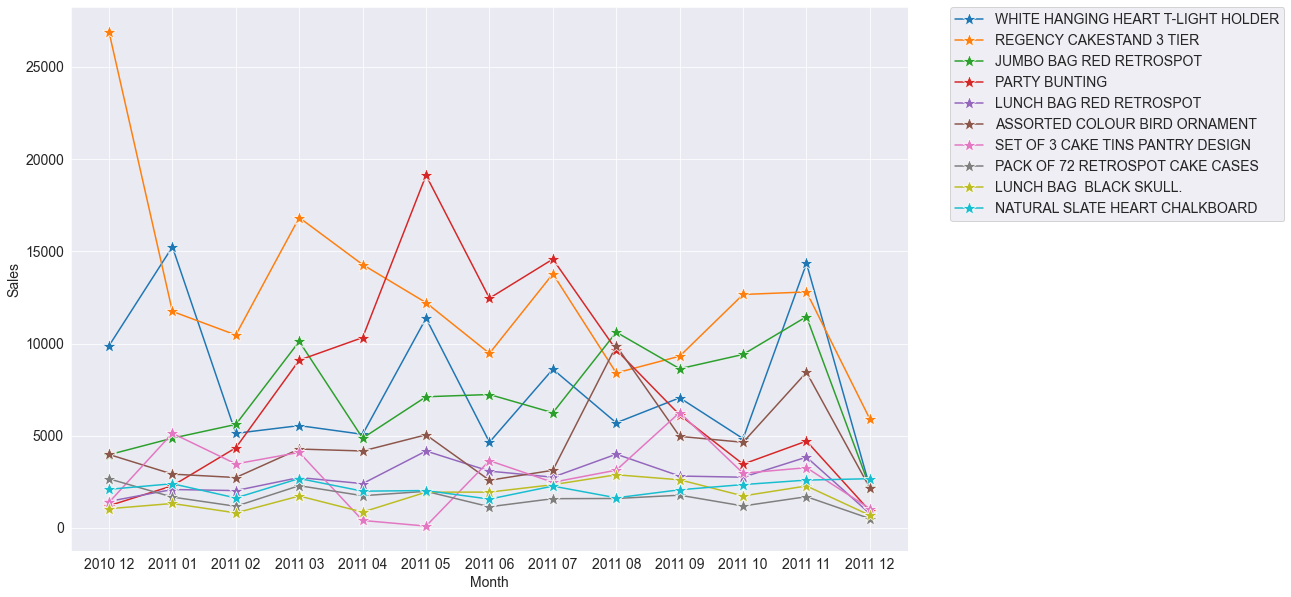

In [54]:
plt.figure(figsize=(15,10))
plt.ylabel('Sales')
for i in top_product_monthly_sales.columns:
    sns.lineplot(x=top_product_monthly_sales.index,y=top_product_monthly_sales[i],label=i,marker='*',markersize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

The graph above demostrates the line line plots for top ten products. It is observed that  'Regency Cakesstand 3Tier' has most sales in the starting months but later on the sales have droped drastiacally. whereas 'White Hanging Heart T-Light Holder' has constant high sales for all the months so it has been the most selling product. 

#### Q3: TODO - Which day the sales are more ?

This question can be answered by creating a new column named 'Day' by converting the InvoiceDate column to Day format which represent the days of the week. Later, grouping the Day column by taking sum of the Total_Price. 

In [55]:
df["Day"]=df['InvoiceDate'].dt.strftime('%A')

In [56]:
day_sales=df.groupby('Day')['Total_Price'].sum()
day_sales

Day
Friday       1540610.811
Monday       1588609.431
Sunday        805678.891
Thursday     2112519.000
Tuesday      1966182.791
Wednesday    1734147.010
Name: Total_Price, dtype: float64

The above table demostrates the days and the sum of the Total_Price on the pirticular days.

In [57]:
days=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
day_sales=day_sales.reindex(days)
day_sales

Day
Sunday        805678.891
Monday       1588609.431
Tuesday      1966182.791
Wednesday    1734147.010
Thursday     2112519.000
Friday       1540610.811
Saturday             NaN
Name: Total_Price, dtype: float64

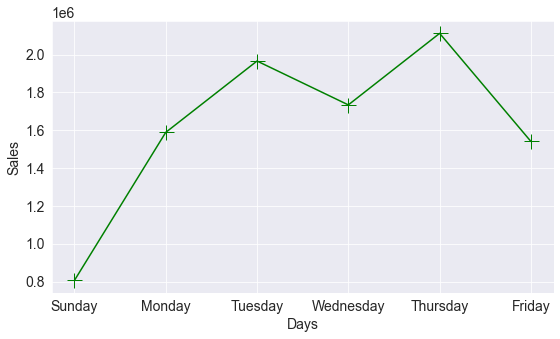

In [58]:
plt.xlabel('Days')
plt.ylabel('Sales')
plt.plot(day_sales.index,day_sales.values,marker='+',markersize=15,color='green')

It appears that sales are lowest on sundays and highest on thrusdays. It is also observed that there are no sales on saturdays by which we can assume that saturdays are holiday for the given eCommerce website. 

#### Q4: TODO -  How many customers are ordering every month ?

To answer this question we filter only the registered customers(i.e customers with CustomerID) and customers without CustomerID has been neglected. Later, grouping the dataframe by month and creating a list consisting of month and unique customers in the pirticular month by this we can study the amount of customers ordering every month and also we can identify new customers.

In [59]:

df_na=df[['CustomerID','Month','Total_Price']][df['CustomerID'].isnull()==False]
df_na

,CustomerID,Month,Total_Price
Date,,,
2010-12-01,17850.0,2010 12,15.30
2010-12-01,17850.0,2010 12,20.34
2010-12-01,17850.0,2010 12,22.00
2010-12-01,17850.0,2010 12,20.34
2010-12-01,17850.0,2010 12,20.34
...,...,...,...
2011-12-09,12680.0,2011 12,10.20
2011-12-09,12680.0,2011 12,12.60
2011-12-09,12680.0,2011 12,16.60


In [60]:
month_customer=df_na.groupby('Month')

In [61]:
list=[]
for i,j in month_customer:
    k=[i,j['CustomerID'].unique()]
    list.append(k)
list

[['2010 12',
  array([17850., 13047., 12583., 13748., 15100., 15291., 14688., 17809.,
         15311., 14527., 16098., 18074., 17420., 16029., 16250., 12431.,
         17511., 17548., 13705., 13747., 13408., 13767., 17924., 13448.,
         15862., 15513., 12791., 16218., 14045., 14307., 17908., 17920.,
         12838., 13255., 16583., 18085., 13758., 13694., 15983., 14849.,
         17968., 16210., 17897., 17377., 16552., 17181., 17951., 14729.,
         12748., 15012., 12868., 17572., 14078., 14001., 12662., 15525.,
         14237., 17905., 15485., 12433., 16955., 15350., 15605., 18144.,
         15922., 14594., 15165., 14911., 16456., 17841., 12472., 17346.,
         17643., 17873., 13093., 12921., 13468., 17760., 16928., 16048.,
         16274., 14496., 14696., 16539., 17025., 13777., 17690., 12947.,
         17460., 18229., 14142., 17069., 13065., 14606., 16835., 15235.,
         13576., 18011., 13090., 15694., 14741., 13715., 14092., 17732.,
         12855., 15752., 17855., 14047

In [62]:
new_customer=pandas.Series([len(i[1]) for i in list], index=[i[0] for i in list])
new_customer=pandas.DataFrame(new_customer,columns=['No_of_customers'])
new_customer

,No_of_customers
2010 12,948
2011 01,783
2011 02,798
2011 03,1020
2011 04,899
2011 05,1079
2011 06,1051
2011 07,993
2011 08,980
2011 09,1302


The above table describes about the month and the number of customers ordered in the pirticular month. 

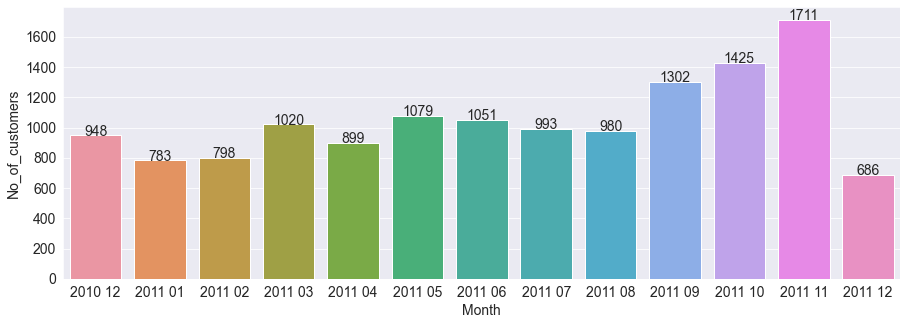

In [63]:
plt.figure(figsize=(15,5))
plt.xlabel('Month')
ax=sns.barplot(x=new_customer.index,y=new_customer['No_of_customers'])
for i in range(len(new_customer.index)):
    ax.text(i,new_customer['No_of_customers'][i],new_customer['No_of_customers'][i],ha='center')

It appears that the most number of customers orders in month of November 2011 and least were on December 2011. Moreover, we can observe that there steady rise of customers from June 2011 and there is sudden drop after November 2011. 

#### Q5: TODO - Who are the top 10 high value customers ?

It is important to identify the customers who has contributed to the revenue by shopping most. For that, we group the dataframe by CustomerID by taking sum of the Total_Price of each customer and followed by sorting the total price of each customer in descending order and filtering the top ten customers. 

In [64]:
highval_cus=df_na.groupby('CustomerID')['Total_Price'].sum()
highval_cus=highval_cus.sort_values(ascending=False)
highval_cus.head(10)

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: Total_Price, dtype: float64

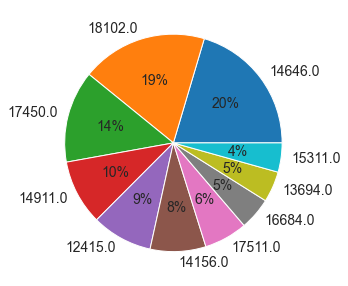

In [65]:
plt.pie(highval_cus.values[:10],labels=[i for i in highval_cus.index[:10]],autopct='%0.0f%%')
plt.show()

From the above pie plot it is observed that CustomerID '14646' is the high value customer who shopped the most. Although, CustomerID '17841' who has placed most of orders but the value of shopping is less compared to CustomerID '14646'.  

Let us save and upload our work to Jovian before continuing.

In [66]:
import jovian

In [67]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vishalvinayt/ecommerce-data" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/vishalvinayt/ecommerce-data


'https://jovian.ai/vishalvinayt/ecommerce-data'

## Inferences and Conclusion

1. Over 90% of orders are from United Kingdom.
2. 'White Hanging Heart T-Light Holder' is the most ordered product in United kingdom.
3. CustomerID '17841.0' from United Kingdom has placed most orders.
4. Around 2% of orders are cancelled in year 12/2010-12/2011.
5. November 2011 was the month with high sales.
6. December 2011 was the month with low sales.
7. Most the sales are occured in Thursdays.


In [68]:
import jovian

In [69]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vishalvinayt/ecommerce-data" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/vishalvinayt/ecommerce-data


'https://jovian.ai/vishalvinayt/ecommerce-data'

## References and Future Work

1. Dataset Reference: 'https://www.kaggle.com/datasets/carrie1/ecommerce-data' 
2. Pandas Documentation: User Guide — pandas 1.4.2 documentation (pydata.org)
3. Matplotlib Documentation: https://matplotlib.org/stable/tutorials/index.html
4. Seaborn Documentation: https://seaborn.pydata.org/tutorial/distributions.html
5. Reference Project: Exploratory Data Analysis : E-Commerce | Kaggle
6. Other References: python - Move legend outside figure in seaborn tsplot - Stack Overflow

In [70]:
import jovian

In [71]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vishalvinayt/ecommerce-data" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/vishalvinayt/ecommerce-data


'https://jovian.ai/vishalvinayt/ecommerce-data'